In [ ]:
import pandas as pd

# def calculate_demographic_data(print_data = True):
    
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\adult.data.csv")

    # How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
print(df.head())

In [ ]:
print(df.info())

In [ ]:
average_age_of_men = df[df["Gender"] == "Male"]["Age"].mean()
print(average_age_of_men)

def average_age_of_men(df):
    return df[df["Gender"] == "Male"]["Age"].mean()
print(average_age_of_men(df))


In [ ]:
average_age_of_men = df[df["gender"].str.title() == "male"]["Age"].mean()
print(average_age_of_men)

In [ ]:
print(df[df["Gender"] == "Male"]["Age"].isna().sum())

In [ ]:
average_age = df.groupby("Gender")["Age"].mean()
print(average_age)
average_male = average_age[" Male"]
print(average_male)

print(df["Gender"].unique())

In [ ]:
print(df.columns)

In [ ]:
df["Education"] = df["Education"].str.strip()


print(df["Education"].unique())
print(df["Gender"].unique())
print(df["Work Class"].unique())
print(df["Race"].unique())
print(df["Education nums"].unique())
print(df["Marital status"].unique())
print(df["Occupation"].unique())
print(df["Relationship"].unique())
print(df["Capital-Gain "].unique())
print(df["Capital-Loss"].unique())
print(df["Salary"].unique())
print(df["Hours-per-week"].unique())
print(df["Native-Country"].unique())
print(df["fllwgt"].unique())
print(df["Age"].unique())

In [ ]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\adult.data.csv")
# List of columns you want to trim
columns_to_trim = ["Education", "Gender", "Work Class", "Race", "Marital status", 
"Occupation", "Relationship", "Native-Country", "Salary"]

# Apply strip to each column in the list
df[columns_to_trim] = df[columns_to_trim].apply(lambda x: x.str.strip())


# How many people of each race are represented in this dataset?
race_count = df["Race"].value_counts()
print("Race count:", race_count)

# What is the average age of men?
average_age_of_men = df[df["Gender"] == "Male"]["Age"].mean()
print("Average age of men:", average_age_of_men)

# What is the percentage of people who have a Bachelor's degree?
bachelors_degree_count = df[df["Education"] == "Bachelors"].shape[0]
total_count = df.shape[0]
bachelors_percentage = (bachelors_degree_count / total_count) * 100
print("Percentage with Bachelor's degree:", bachelors_percentage)

# What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
advanced_education = df[df["Education"].isin(["Bachelors", "Masters", "Doctorate"])]
advanced_education_high_salary = advanced_education[advanced_education["Salary"] == ">50K"]
percentage_of_advanced_education_high_salary = advanced_education_high_salary.shape[0] / advanced_education.shape[0] * 100
print(f"Percentage of advanced education earning >50K: {percentage_of_advanced_education_high_salary:.1f}%")

# What percentage of people without advanced education make more than 50K?
without_advanced_education = df[~df["Education"].isin(["Bachelors", "Masters", "Doctorate"])]
without_advanced_education_high_salary = without_advanced_education[without_advanced_education["Salary"] == ">50K"]
percentage_of_without_advanced_education_high_salary = without_advanced_education_high_salary.shape[0] / without_advanced_education.shape[0] * 100
print(f"Percentage of without advanced education earning >50K: {percentage_of_without_advanced_education_high_salary:.1f}%")

# What is the minimum number of hours a person works per week?
min_hour = df["Hours-per-week"].min()
print("Minimum number of hours:", min_hour)

# What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
min_hours_of_people = df[df["Hours-per-week"] == min_hour]
min_hours_of_people_high_salary = min_hours_of_people[min_hours_of_people["Salary"] == ">50K"]
percentage_of_min_hours_of_people_high_salary = min_hours_of_people_high_salary.shape[0] / min_hours_of_people.shape[0] * 100
print(f"Percentage of people who work the min number of hours earning above 50K: {percentage_of_min_hours_of_people_high_salary:.1f}%")

country_high_salary = df[df["Salary"] == ">50K"].groupby("Native-Country").size() / df.groupby("Native-Country").size() * 100
print(country_high_salary) # This shows the percentage of people in each country earning above 50k
country_with_highest_percentage = country_high_salary.idxmax()
highest_percentage = country_high_salary.max()
print(f"Country with the highest percentage of people that earn above >50K: {country_with_highest_percentage} {highest_percentage:.1f}%")

# Identify the most popular occupation for those who earn >50K in India
india_high_salary = df[(df["Native-Country"] == "India") & (df["Salary"] == ">50K")]
most_popular_occupation_in_india = india_high_salary["Occupation"].value_counts().idxmax()
print(f"Most popular occupation earning above 50k in India: {most_popular_occupation_in_india}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import the data from medical_examination.csv and assign it to the df variable.
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\medical_examination_dataset.csv")
print(df.shape) # checking for count of rows and columns
print(df.describe()) # Viewed the statistical properties of the data
print(df.info()) # Viewed the structure of the data
print(df.head()) # viewed a portion of the data

# Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight 
# in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT 
# overweight and the value 1 for overweight.
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2)) > 25).astype(int)
print("\nAdded 'overweight' column based on BMI > 25 (first 5 rows):")
print(df[['weight', 'height', 'overweight']].head())  # View weight, height, and new overweight column

# Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value
# is more than 1, set the value to 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
print("\nNormalized 'cholesterol' and 'gluc' values (first 5 rows):")
print(df[['cholesterol', 'gluc']].head())  # View normalized columns

# Draw the Categorical Plot in the draw_cat_plot function.
def draw_cat_plot():
    # Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the
    #  df_cat variable.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the
    #  columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # Convert the data into long format and create a chart that shows the value counts of the categorical features using the following
    # method provided by the seaborn library import: sns.catplot().
    fig = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")
    fig.set_axis_labels("Variable", "Total")
    fig.set_titles("Cardio = {col_name}")
    fig.despine(left=True)

    # Return the figure without saving it here
    return fig
    
cat_plot_fig = draw_cat_plot()

# Draw the Heat Map in the draw_heat_map function.
def draw_heat_map():
    # Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
    # diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    # height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # height is more than the 97.5th percentile
    # weight is less than the 2.5th percentile
    # weight is more than the 97.5th percentile
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix and store it in the corr variable.
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle and store it in the mask variable.
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure.
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
    sns.heatmap(corr, annot=True, mask=mask, square=True, fmt='.1f', center=0, vmin=-0.1, vmax=0.25, cmap='coolwarm')

    # Return the figure without saving it here
    return fig

heat_map_fig = draw_heat_map()

# Display the figures, saving them with full paths as desired
cat_plot_fig.savefig("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\categorical_plot.png")
heat_map_fig.savefig("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\heat_map.png")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the dataset using pandas
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB
None
              value
count  1.304000e+03
mean   6.722068e+04
std    5.933964e+04
min    1.201000e+03
25%    3.575775e+04
50%    5.719750e+04
75%    8.388300e+04
max    1.173655e+06
(1304, 1)


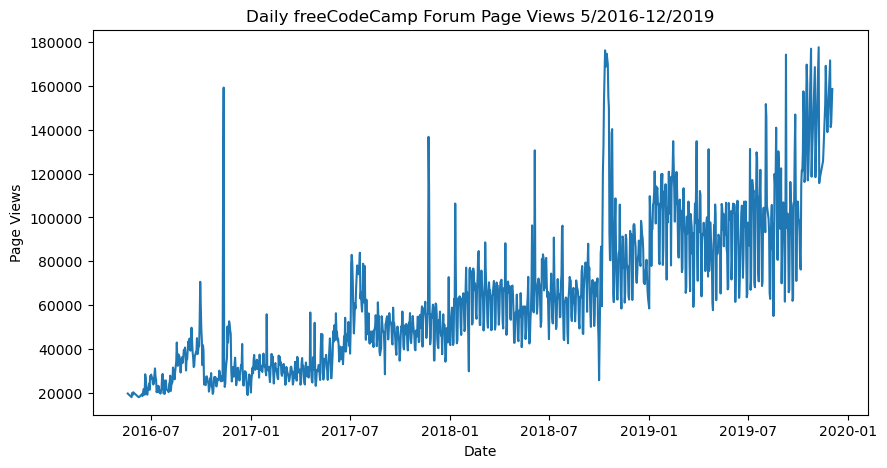

In [8]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
lower_bound = df["value"].quantile(0.025)
upper_bound = df["value"].quantile(0.975)
df_cleaned = df[(df["value"] >= lower_bound) & (df["value"] <= upper_bound)]

# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be 
# Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page 
# Views.
def draw_line_plot():
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the data
    ax.plot(df_cleaned.index, df_cleaned["value"], color="tab:blue")
    
    # Title and labels
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    
    # Show the plot
    plt.show()

# Generate the line plot
draw_line_plot()


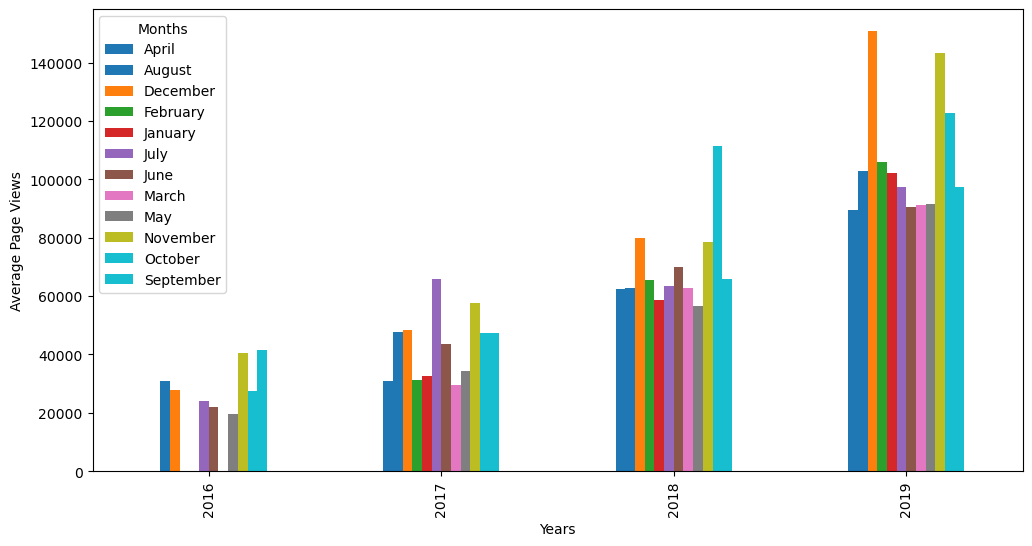

In [12]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views 
# for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis 
# should be Years and the label on the y axis should be Average Page Views.
def draw_bar_plot():
    # Prepare the data for bar plot
    df_bar = df_cleaned.copy()
    df_bar["Year"] = df_bar.index.year
    df_bar["Month"] = df_bar.index.month_name()
    
    # Group the data by year and month, then calculate the mean for each group
    df_bar = df_bar.groupby(["Year", "Month"])["value"].mean().unstack()
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    df_bar.plot(kind="bar", ax=ax, legend=True, cmap="tab10")
    
    # Title and labels
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months")
    
    # Show the plot
    plt.show()

# Generate the bar plot
draw_bar_plot()

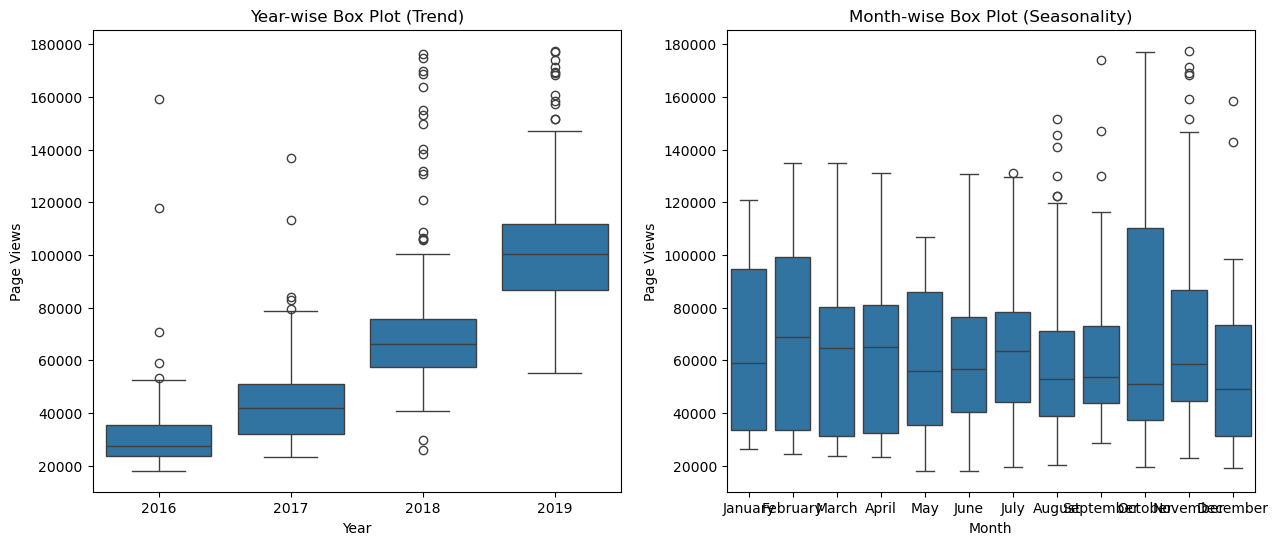

In [13]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots 
# should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart 
# should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the 
# month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
def draw_box_plot():
    # Prepare the data for box plot
    df_box = df_cleaned.copy()
    df_box["Year"] = df_box.index.year
    df_box["Month"] = df_box.index.month_name()
    df_box["Month"] = pd.Categorical(df_box['Month'], 
    categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], 
    ordered=True)
    
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Year-wise Box Plot
    sns.boxplot(x="Year", y="value", data=df_box, ax=ax1)
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
    
    # Month-wise Box Plot
    sns.boxplot(x="Month", y="value", data=df_box, ax=ax2)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    
    # Show the plot
    plt.show()

# Generate the box plot
draw_box_plot()

In [ ]:
import pandas as pd
import numpy as np

s = pd.Series(['a', 3, np.nan, 1, np.nan])

print(s.notnull().sum())

import pandas as pd
import numpy as np

s = pd.Series([np.nan, 1, 2, np.nan, 3])
s = s.fillna(method='ffill')

print(s)

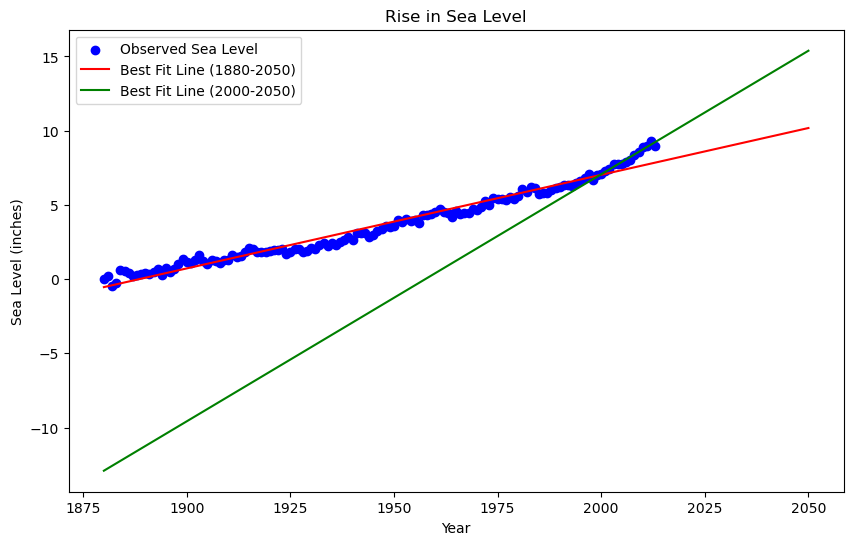

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Use Pandas to import the data from epa-sea-level.csv.
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\epa-sea-level.csv")

# print(df.head())
# print(df.info())
# print(df.describe())
# print(df.shape)

# Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
plt.figure(figsize=(10, 6))
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], color="blue", label="Observed Sea Level")

# Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit 
# over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
# Generate x-values for the line of best fit up to 2050
years_extended = pd.Series(range(1880, 2051))
sea_level_pred = intercept + slope * years_extended
# Plot the line of best fit on the entire dataset
plt.plot(years_extended, sea_level_pred, "r", label="Best Fit Line (1880-2050)")

# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go 
# through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
recent_df = df[df["Year"] >= 2000]
slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(
recent_df["Year"], recent_df["CSIRO Adjusted Sea Level"])
# Predict sea levels for the recent trend up to 2050
sea_level_pred_recent = intercept_recent + slope_recent * years_extended
# Plot the second line of best fit
plt.plot(years_extended, sea_level_pred_recent, "green", label="Best Fit Line (2000-2050)")

# The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.legend()

# Save and display the plots
plt.savefig("sea_level_plot.png")
plt.show()